In [162]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [138]:
class KNNClassifier(object):
    def __init__(self, k):
        self.X_train = None
        self.y_train = None
        self.k = k
        
    def closest(self, row):
        """
        Retorna a classe respondente ao ponto mais próximo do dataset de treino.\
        É um exemplo de implementação do kNN com k=1.
        """
        
        dists = euclidean_distances(row, self.X_train.iloc[:,:])
        k_neighbours = np.argsort(dists[0])[:self.k]
        k_labels = self.y_train.loc[k_neighbours]
        labels, counts = np.unique(k_labels, return_counts=True)
        idx = list(counts).index(max(counts))
        return labels[idx]

    def fit(self, training_data, training_labels):
        self.X_train = training_data
        self.y_train = training_labels

    def predict(self, to_classify):
        predictions = []
        for row in range(len(to_classify)):
            label = self.closest(to_classify.iloc[row])
            predictions.append(label)
        return predictions

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.131900,-0.361353,0.083081,0.018443,-0.549500,0.173511
Sex,0.131900,1.000000,0.024978,-0.114631,-0.245489,-0.182333,0.118492
Age,-0.361353,0.024978,1.000000,-0.184664,-0.048786,0.135516,0.069705
SibSp,0.083081,-0.114631,-0.184664,1.000000,0.414838,0.159651,0.071480
Parch,0.018443,-0.245489,-0.048786,0.414838,1.000000,0.216225,0.043351
Fare,-0.549500,-0.182333,0.135516,0.159651,0.216225,1.000000,-0.230365
Embarked,0.173511,0.118492,0.069705,0.071480,0.043351,-0.230365,1.000000


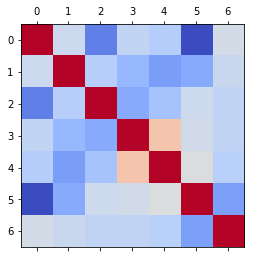

In [166]:
data = pd.read_csv('titanic.csv')
string_features = ['Sex', 'Embarked']
data_cat = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
labels = data[['Survived']]

for h in string_features:
    data_cat[h] = data_cat[h].astype('category')
    data_cat[h] = data_cat[h].cat.codes

data_cat = data_cat.fillna(0)

cmap = cm.get_cmap('coolwarm')

cor = data_cat.corr()
plt.matshow(cor, cmap=cmap)
cor

Features 0 e 5 possuem correlação negativa

In [ ]:
scaler = MaxAbsScaler().fit(data_cat.iloc[:,:])
data_cat = pd.DataFrame(scaler.transform(data_cat))

train_x = data_cat.iloc[:579,:]
train_y = labels.iloc[:579,:]
val_x = data_cat.iloc[579:668,:]
val_y = labels.iloc[579:668,:]
test_x = data_cat.iloc[668:,:]
test_y = labels.iloc[668:,:]

In [176]:
n = len(val_x)
accs = {}
print('k\taccuracy')
for k in range(4, 30*4 ,4):
    knn = KNNClassifier(k)
    knn.fit(train_x, train_y)
    predictions = knn.predict(val_x)
    hits = 0
    for i in range(n):
        if predictions[i] == val_y.iloc[i,0]:
            hits += 1
    accs.update({k: hits/n})
    print(k, hits/n)

k	accuracy
4 0.8202247191011236
8 0.8089887640449438
12 0.8089887640449438
16 0.7752808988764045
20 0.7752808988764045
24 0.7752808988764045
28 0.7752808988764045
32 0.7752808988764045
36 0.7752808988764045
40 0.7752808988764045
44 0.7752808988764045
48 0.7640449438202247
52 0.7752808988764045
56 0.7528089887640449
60 0.7528089887640449
64 0.7528089887640449
68 0.7528089887640449
72 0.7528089887640449
76 0.7528089887640449
80 0.7528089887640449
84 0.7528089887640449
88 0.7528089887640449
92 0.7528089887640449
96 0.7528089887640449
100 0.7528089887640449
104 0.7528089887640449
108 0.7528089887640449
112 0.7528089887640449
116 0.7528089887640449


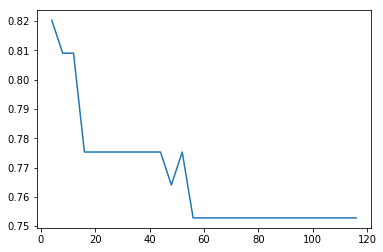

In [195]:
x = list(accs.keys())
y = list(accs.values())
plt.plot(x, y)

In [201]:
# melhor k: 4

n = len(test_x)

knn = KNNClassifier(4)
knn.fit(train_x, train_y)
predictions = knn.predict(test_x)
hits = 0
for i in range(n):
    if predictions[i] == test_y.iloc[i,0]:
        hits += 1
print(hits/n)

0.7937219730941704


In [203]:
print(classification_report(test_y.iloc[:], predictions, target_names=['Survived', 'Not Survived']))

              precision    recall  f1-score   support

    Survived       0.80      0.89      0.85       141
Not Survived       0.77      0.62      0.69        82

 avg / total       0.79      0.79      0.79       223

